# 41、数据挖掘实战（3）：对比特币的走势进行预测

我们之前使用了数据挖掘算法中的分类，聚类，回归和关联分析算法，那么对于比特币的走势的预测，采用哪种的方法比较好？

可能有人会认为采用回归分析会好一点，因为预测的结果是连续的数值类型的。实际上，数据挖掘算法还有一种叫做时间序列分析的算法，时间序列分析模型建立了观察结果与时间变化的关系，能帮我们预测未来的一段时间内的结果变化情况。

那么时间序列分析和回归分析有哪些区别呢？

首先，在选择模型前，我们需要确定结果与变量之间的关系。回归分析训练得到的是目标变量y与自变量x（一个或者多个）的相关性，然后通过新的自变量x来预测目标变量y。而时间序列分析得到的是目标变量y与时间的相关性。

另外，回归分析擅长的是多自变量与目标结果之间的分析，即便是单一的变量，也往往与时间无关。而时间序列分析建立在时间变化的基础上，它会分析目标变量的趋势，周期，时期和不稳定的因素等。这些趋势和周期都是在时间维度的基础上的，我们要观察的重要特征。

这对需要进行的预测比特币走势的项目，需要掌握的目标是：
- 1、了解时间序列预测的概念，以及常用的模型算法，包括AR、MA、ARMA、ARIMA模型等；
- 2、掌握并使用ARMA模型工具，对一个时间序列数据进行建模预测。
- 3、对比特币的历史数据进行时间序列建模，并预测未来的6个月的走势。

什么？不知道什么是比特币！？

> 比特币的概念是在2009年的时候，由一个名叫中本聪的人提出的，比特币是一种虚拟的数字货币，比特币和其它数字货币的最大不同就是比特币的数量是恒定的，比特币的总量被限制在2100万个，一个比特币就是一个特解，特解指方程组所能得到有限个解中的一组。
比特币的价格是会随着时间、交易场所的不同而发生波动的，比特币属于一种高风险投资，其价格跌涨也是没有限制的，可能一夜之间暴富，也可能一夜之间亏的血本无归，关于比特币值多少人民币的问题，大家可以通过各大交易平台来看出比特币实时价格，比特币的价格每时每刻都在波动，4月16日，BCEX公布的最新比特币价格为34471.11元人民币，Bibox公布的价格为33878.19人民币。
比特币从诞生到至今，其价格也是经历了多次跌涨，2009年比特币诞生初期，一美元可以买到1300枚比特币，在2010年的时候，比特币的价格在0.003美元左右一枚，直到2013年11月，比特币的价格经历了首次保障，当时一枚比特币的价格在8000元人民币左右，2017年比特币再次创造了奇迹，其价格在2017年12月的时候创造了历史最高价，一枚比特币的最高价值将近20000美元，换算成人民币，一枚比特币的价格将近13万人民币，也正是比特币的此次疯涨让无数人关注到了数字货币，在经历暴涨后，比特币的价格迅速暴跌了70%。

## 时间序列预测

关于时间序列，我们可以把它理解为按照时间顺序组成的数字序列。实际上在中国的古代的农业社会中，人们就将一年中的不同的时间节点和天气的规律总结下来，形成了二十四节气。也就是从时间的序列中观察天气和太阳的规律（只是当时没有时间的序列模型和相应的工具），从而使得农业得到迅速发展。在现代社会，时间序列在金融，经济，商业领域拥有广泛的应用。

在时间的序列预测模型中，有一些经典的模型，包括AR，MA，ARMA，ARIMA等。

AR的英文名称叫做Auto Regressive，中文叫做自回归模型。这个算法的思想比较简单，他认为过去的若干的时刻的点通过线性组合，在加上白噪声就可以预测未来的某个时刻的点。

在我们的日常的生活环境中就存在白噪声，在数据挖掘的过程中，你可以把它理解为一个期望为0，方差为常数的纯随机的过程。AR模型还存在一个阶数，称为AR（p）模型，也叫做p自回归模型。它值的是通过这个时刻点的前p个点，通过线性组合再加上白噪声来预测当前的时刻点的值。

MA的英文全称是叫做Moving Average ，中文叫做滑动平均模型。它与AR模型大同小异，AR模型是历史时序值的线性组合，MA是通过历史白噪声进行的线性组合来影响当前的时刻点。AR模型中的历史白噪声是通过影响历史的时序值，从而间接影响到当前的时刻点的预测值。同样MA模型也存在一个阶数，成为MA(q)模型，也叫做q阶移动平均模型。我们能够看到AR和MA模型都是存在阶数，在AR模型中，我们用p表示，在MA模型中我们用q表示，这两个模型大同小异，与AR模型不同的是MA模型是历史的白噪声的线性组合。

ARMA的英文全称是Auto Regressive Moving Average,中文叫做自回归滑动平均模型，也就是AR和MA模型的混合。相比AR模型和MA模型，它有更加准确的估计。同样ARMA模型存在p和q两个结束，称为ARMA(p,q)模型。

ARIMA的英文全称是Auto Regressive Integrated Moving Average模型，中文叫做查分自回归滑动平均模型，也叫求合自回归滑动平均模型。相比于ARMA，ARIMA多了一个差分的过程，作用是对不平稳的数据进行差分平稳，在差分平稳之后在进行建模。ARIMA的原理和ARMA模型一样。相比于ARMA(p,q)两个阶数，ARIMA是一个三元组的阶数(p,d,q),称为ARIMA(p,d,q)模型。其中d是差分阶数。

## ARMA 模型工具

上面介绍的AR，MA，ARMA，ARIMA四种模型，我们只需要连接基本的概念（能理解说出来），中间涉及到的一些数学公式。

在实际的工作中，我们更多的是使用工具，那如何使用ARMA模型工具呢？在使用ARMA工具之前，我们需要先安装：`sudo pip3 install statsmodels`

然后引入对应的工具包：

In [ ]:
from statsmodels.tsa.arima_model import ARMA

然后通过ARMA(endog,order,exog=None)创建ARMA类，这里说明一下参数的涵义：

endog:英文是endogenous variable, 代表的是内生变量，又叫做非政策性变量，它是由模型决定的，不被政策左右，可以说是我们想要分析的变量，或者说是我们这次项目中需要用到的变量。

order:代表的是p和q的值，也就是ARMA中的阶数。

exog:英文是exogenous variables,代表的是外生变量。外生变量和内生变量一样是经济模型中的两个重要的变量。相对于内生变量，外生变量又叫做政策性变量，在经济机制内受到外部因素的影响，不是我们模型研究的变量

举个例子，如果我们想要创建ARMA(7,0)模型，可以写成：ARMA(data,(7,0)),其中data是我们想要观察的变量，（7,0）代表（p,q）的阶数

创建好之后，我们可以通过fit函数进行拟合，通过predict(start, end)函数进行预测，其中start为预测的起始时间，end为预测的终止时间。

下面是使用ARMA模型对一组时间序列做建模代码：

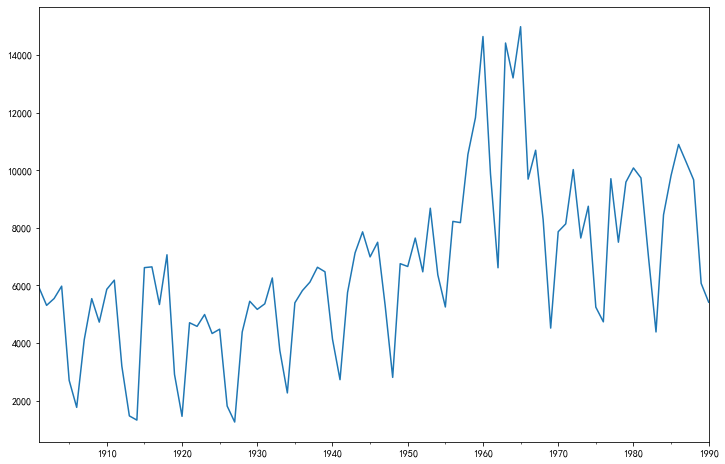

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


AIC: 1619.6323


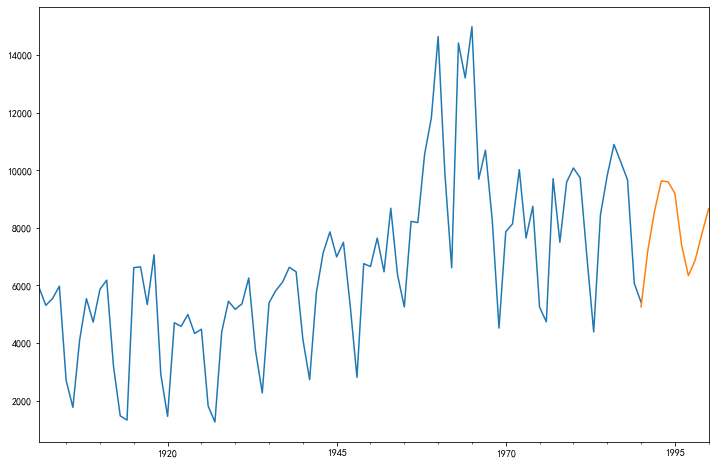

In [3]:
# coding:utf-8
# 使用ARMA进行时间序列的预测
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
# 创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]
data = pd.Series(data)
data_index = sm.tsa.datetools.dates_from_range('1901','1990')
# 绘制数据图
data.index = pd.Index(data_index)
data.plot(figsize=(12, 8))
plt.show()
# 创建ARMA模型
arma = ARMA(data,(7,0)).fit()
print('AIC: %0.4lf' %arma.aic)
# 模型预测
predict_y = arma.predict('1990', '2000')
# 预测结果绘制
fig, ax = plt.subplots(figsize=(12, 8))
# data.ix将会被弃用，所以使用data.loc
ax = data.loc['1901':].plot(ax=ax)
predict_y.plot(ax=ax)
plt.show()

上面的代码中创建了1901年-1990年之间的时间序列数据data,然后创建ARMA(7,0)模型，并传入时间序列数据data,使用fit函数拟合，然后对1990年-2000年之间的数据进行预测，最后绘制预测结果。

我们可以看到ARMA工具的使用还是很方便的，只是我们需要p和q的取值。在实际项目中，我们可以给p和q指定一个范围，让ARMA都运行一下，然后选择最适合的模型。

那么，怎样判断一个模型是否合适？

我们需要引入AIC准则，也叫做赤池消息准则，它是衡量统计模型拟合好坏的一个标准，数值越小代表模型拟合的越好。

在这个例子中，我们能看到ARMA(7,0)这个模型拟合出来的AIC是1619.6323(并不一定是最优的)

## 对比特币走势进行预测

我们都知道比特币的走势除了和历史数据以外，还和很多的外界因素相关，比如用户的关注度，各国的政策，币圈之间是否打架等等。当然这些外界的因素不是我们需要考虑的对象。

假设我们只考虑比特币以往的历史数据，使用ARMA这个时间序列模型预测比特币的走势。

**数据集：** 使用的比特币历史数据是（从2012-01-01到2018-10-31）的数据。

数据一共包含了8个字段，代表的含义如下：

|字段|含义|
|--|--|
|Timestamp|日期|
|Open|开盘价|
|High|最高价|
|Low|最低价|
|Close|收盘价|
|Volumne_(BTC)|比特币的成交量|
|Volumne_(Currency)|成交金额|
|Weighted_Price|比特币的平均价格|



我们的目标是构造ARMA时间序列模型，预测比特币的（平均）价格走势。p和q参数具体选择多少？我们可以设置一个区间范围，然后选择AIC最低的ARMA模型。

梳理整个流程如下：
![](比特币走势分析.jpg)

首先我们需要加载数据。

在准备阶段，我们需要先探索数据，采用数据可视化的方式查看比特币的历史走势。按照不同的时间尺度（天，月，季度，年）可以将数据压缩，得到不同的尺度的数据，然后做可视化呈现。这4个时间尺度上，我们选择月作为预测模型的时间尺度，相应的，我们选择Weighted_Price这个字段的数值作为观察的结果，在原始数据中，Weighted_Price对应的是比特币每天的平均价格，当我们以“月”为单位进行压缩的时候，对应的Weighted_Price得到的就是当月的比特币的平均价格。压缩代码如下：

In [ ]:
df_month = df.resample('M').mean()

最后在预测阶段创建的ARMA时间序列模型。我们并不知道p和q取什么值时，模型最优，因此我们可以给它们设置一个区间范围，比如都是range(0,3),然后计算不同模型的AIC数字，选择最小的AIC数值对应的那个ARMA模型。最后用这个最优的ARMA模型预测未来的8个月的比特币的走势，并将结果做可视化呈现：

基于这个流程，具体代码如下：

            Timestamp      Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                                     
2011-12-31 2011-12-31  4.465000  4.482500  4.465000  4.482500     23.829470   
2012-01-01 2012-01-01  4.806667  4.806667  4.806667  4.806667      7.200667   
2012-01-02 2012-01-02  5.000000  5.000000  5.000000  5.000000     19.048000   
2012-01-03 2012-01-03  5.252500  5.252500  5.252500  5.252500     11.004660   
2012-01-04 2012-01-04  5.200000  5.223333  5.200000  5.223333     11.914807   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
2011-12-31         106.330084        4.471603  
2012-01-01          35.259720        4.806667  
2012-01-02          95.240000        5.000000  
2012-01-03          58.100651        5.252500  
2012-01-04          63.119578        5.208159  


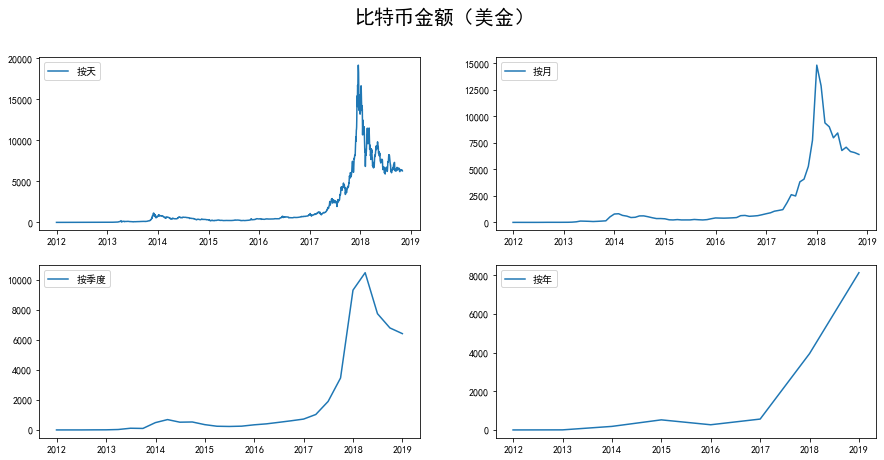

参数错误: (0, 2)
最优模型：                               ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                   83
Model:                     ARMA(1, 1)   Log Likelihood                -688.761
Method:                       css-mle   S.D. of innovations            957.765
Date:                Tue, 06 Aug 2019   AIC                           1385.522
Time:                        23:29:53   BIC                           1395.198
Sample:                    12-31-2011   HQIC                          1389.409
                         - 10-31-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2097.0004   1566.702      1.338      0.185    -973.680    5167.680
ar.L1.Weighted_Price     0.9251      0.042     22.044      0.000       0.843      

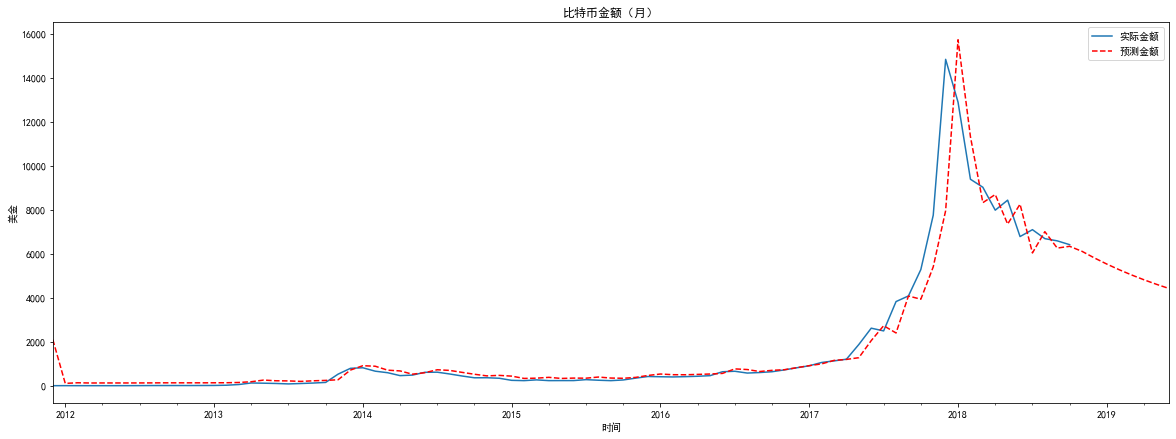

In [4]:
# -*- coding:utf-8 -*-
# 比特币走势预测，使用时间序列ARMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
# 数据加载
df = pd.read_csv('./bitcoin_2012-01-01_to_2018-10-31.csv')
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp
# 数据探索
print(df.head())
# 按照月，季度，年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()
# 按照天，月，季度，年来显示比特币的走势
fig = plt.figure(figsize=[15,7])
plt.rcParams['font.sans-serif'] = ['SImHei'] # 用来正常显示中文标签
plt.suptitle('比特币金额（美金）',fontsize=20)
plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='按天')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price,'-',label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='按年')
plt.legend()
plt.show()
# 设置参数范围
ps = range(0,3)
qs = range(0,3)
parameters = product(ps,qs)
parameters_list = list(parameters)
# 寻找最优的ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_month.Weighted_Price,order=(param[0],param[1])).fit()
    except ValueError:
        print('参数错误:',param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters','aic']
print('最优模型：', best_model.summary())
# 比特币的预测
df_month2 = df_month[['Weighted_Price']]
# 数据集到10月，所以就从11月开始
date_list = [datetime(2018,11,30),datetime(2018,12,31),datetime(2019,1,31),datetime(2019,2,28),datetime(2019,3,31),
             datetime(2019,4,30),datetime(2019,5,31),datetime(2019,6,30)]
future = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=91)
# 比特币预测结果显示
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot(label='实际金额')
df_month2.forecast.plot(color='r',ls='--', label='预测金额')
plt.legend()
plt.title('比特币金额（月）')
plt.xlabel('时间')
plt.ylabel('美金')
plt.show()

我们通过product函数创建可(p,q)在range(0,3)范围内的所有可能组合，并对每个ARMA(p,q)模型进行了AIC数值计算，保存了AIC数值最小的模型参数。然后用这个模型对比比特币的未来的8个月进行预测。

对`df_month2['forecast'] = best_model.predict(start=0, end=91)`理解
- start=0表示从第0课数据开始计算
- end=348是指需要计算348个数据，即从2011-12-31到2018-10-31一共有91个月，所以有91个数据

从结果中可以看到，在2018年10月之后的8个月的时间里，比特币会触底到4000美金左右，实际上比特币在这个阶段确实是降低到4000元美金设置更低。在时间尺度的选择上，搜门选择了月，这样就对数据进行了降维，也节约了ARMA的模型训练时间。我们能够看到比特币金额（美元）这张图中，按月划分的比特币走势和按天划分的比特币走势差别不大，在减少了局部的波动的同时也能体现出比特币的趋势，这样就节约了ARMA的模型训练时间。


## 总结

1、通过一个比特币的趋势预测的实战项目可以体会到，当我们对一个数值进行预测时候，如果考虑到的是多个变量和结果之间的关系，可以采用回归分析，如果考虑单个时间维度与结果的关系，可以使用时间序列分析。

2、根据比特币的历史数据，我们使用ARMA模型对比特币的未来8个月的走势进行了预测，并对结果进行了可视化显示。我们能够看到ARMA工具还是很好用的，虽然比特币的走势受到很多外在的因素的影响，比如政策环境。不过当我们掌握这些历史数据，也不妨用时间序列模型来分析预测一下。

3、比特币走势预测
    - 时间序列预测
        - 概念：按照时间顺序组成的数字序列，时间序列预测是一种回归预测方法，通过数据预测未来的走势
        - 常用模型
            - AR(p):自回归模型，认为过去若干的时刻的点通过线性组合，再加上白噪声就可以预测到未来的某个时刻的点
            - MA(p,q):滑动平均模型，通过历史的白噪声进行了线性组合来影响当前时刻
                - generate(text):生成词云，传入的参数text代表你要分析的文本
            - ARMA(p,q):AR模型和MA模型的混合
            - ARIMA(p,d,q):差分自回归滑动平均模型，相比于ARMA，多了一个差分过程
    - ARMA工具
        - 引用：from statsmodels.tsa.arima_model import ARMA
        - 构造：ARMA(endog,order,exorg=None)
            - endog:代表内生变量。由模型决定的，不被政策左右的，可以说是我们想要解析的变量
            - order:代表的是p和q的值。也就是ARMA中的阶数
            - exog:代表的是外生变量，受外部因素的影响，不是我们模型想要研究的变量。
        - 功能函数
            - fit():拟合函数
            - predict(start, end):预测函数
                - start：预测的起始时间
                - end:预测的结束时间
        - AIC准则：也叫做赤池消息准则，是衡量统计模型好坏的一个标准，AIC数值越小代表的模型拟合的越好
    - 项目流程
        - 数据加载：
            - 准备阶段：数据探索，数据可视化，特征选择
            - 预测阶段：创建预测器，参数优化，结果可视化
            - 预测分析：未来8个的比特币会大幅度下跌价格将接近4000美金
![](比特币走势预测.png)

## 练习：使用ARMA对上海的股市的未来10个月的走势预测

            Timestamp   Price
Timestamp                    
1990-12-19 1990-12-19   96.05
1990-12-20 1990-12-20  104.30
1990-12-21 1990-12-21  109.07
1990-12-24 1990-12-24  113.57
1990-12-25 1990-12-25  120.09


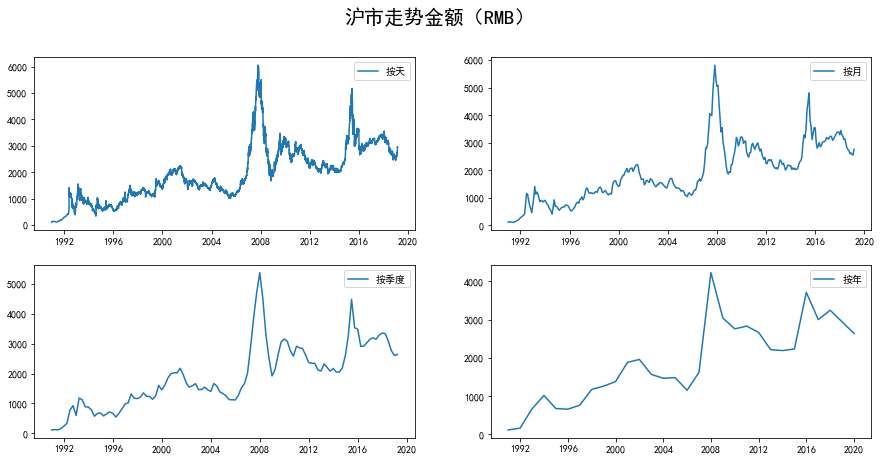

参数错误: (0, 2)
最优模型：                               ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  339
Model:                     ARMA(2, 2)   Log Likelihood               -2208.110
Method:                       css-mle   S.D. of innovations            162.159
Date:                Wed, 07 Aug 2019   AIC                           4428.219
Time:                        11:45:59   BIC                           4451.175
Sample:                    12-31-1990   HQIC                          4437.367
                         - 02-28-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1841.8902    489.577      3.762      0.000     882.338    2801.443
ar.L1.Price     0.5137      0.130      3.959      0.000       0.259       0.768
ar.L2.Price     0.4501      0

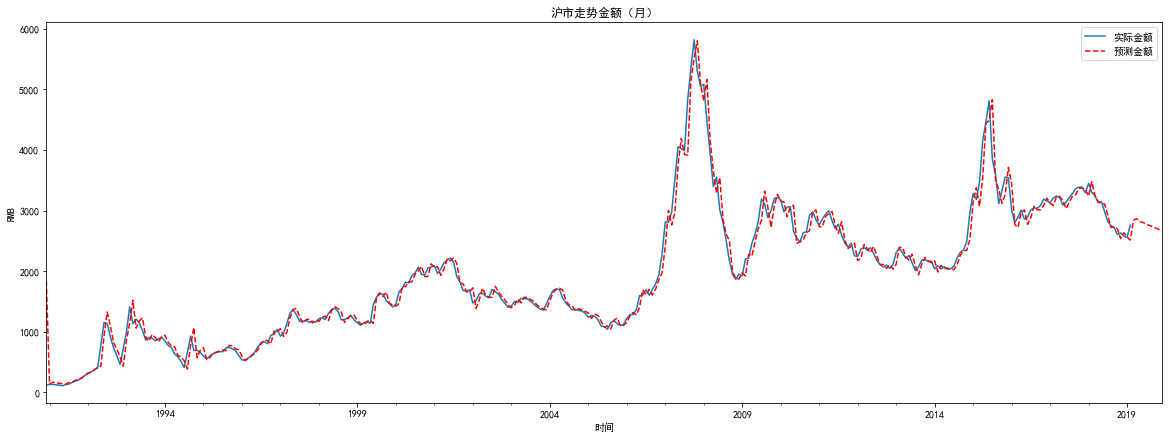

In [11]:
# -*- coding:utf-8 -*-
# 上海市股市走势预测，使用时间序列ARMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')

# 数据加载
df = pd.read_csv('./shanghai_1990-12-19_to_2019-2-28.csv')
# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp

# 数据探索
print(df.head())
# 按照月，季度，年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()

# 按照天，月，季度，年来显示比特币的走势(直接使用Price)
fig = plt.figure(figsize=[15,7])
plt.rcParams['font.sans-serif'] = ['SImHei'] # 用来正常显示中文标签
plt.suptitle('沪市走势金额（RMB）',fontsize=20)
plt.subplot(221)
plt.plot(df.Price, '-', label='按天')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Price,'-',label='按月')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Price, '-', label='按季度')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Price, '-', label='按年')
plt.legend()
plt.show()

# 设置参数范围
ps = range(0,3)
qs = range(0,3)
parameters = product(ps,qs)
parameters_list = list(parameters)
# 寻找最优的ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = ARMA(df_month.Price,order=(param[0],param[1])).fit()
    except ValueError:
        print('参数错误:',param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters','aic']
print('最优模型：', best_model.summary())

# 沪市走势的预测
df_month2 = df_month[['Price']]
date_list = [datetime(2019,3,31),datetime(2019,4,30),datetime(2019,5,31),datetime(2019,6,30),datetime(2019,7,31),
             datetime(2019,8,31),datetime(2019,9,30),datetime(2019,10,31),datetime(2019,11,30),datetime(2019,12,31)]
future = pd.DataFrame(index=date_list, columns=df_month.columns)
df_month2 = pd.concat([df_month2, future])
# start=0表示从第0课数据开始计算
# end=348是指需要计算348个数据，即从1990-12-19到2019-12-31一共有348个月，所以有348个数据
df_month2['forecast'] = best_model.predict(start=0, end=348)
# 比特币预测结果显示
plt.figure(figsize=(20,7))
df_month2.Price.plot(label='实际金额')
df_month2.forecast.plot(color='r',ls='--', label='预测金额')
# 输出预测金额
print(df_month2.forecast)
plt.legend()
plt.title('沪市走势金额（月）')
plt.xlabel('时间')
plt.ylabel('RMB')
plt.show()

从上面的结果可以看出，股市走势是呈现下降趋势的：
```
2019-03-31    2841.772418
2019-04-30    2862.576730
2019-05-31    2816.324532
2019-06-30    2801.927144
2019-07-31    2773.711703
2019-08-31    2752.735709
2019-09-30    2729.259197
2019-10-31    2707.756655
2019-11-30    2686.142703
2019-12-31    2665.360032
```